In [ ]:
!pip install pyupbit

In [ ]:
import pyupbit

coin = 'KRW-IOST'

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv(coin, interval="minute60", count = 1000)
df

,open,high,low,close,volume,value
2021-08-30 21:00:00,50.0,50.0,48.9,49.1,1.761368e+07,8.698752e+08
2021-08-30 22:00:00,49.1,49.7,48.5,49.1,2.621400e+07,1.282406e+09
2021-08-30 23:00:00,49.1,49.5,48.9,48.9,1.021618e+07,5.028353e+08
2021-08-31 00:00:00,48.9,49.8,48.9,49.6,1.163693e+07,5.743263e+08
2021-08-31 01:00:00,49.6,50.1,49.4,50.0,5.679751e+06,2.821558e+08
...,...,...,...,...,...,...
2021-10-09 20:00:00,70.1,71.5,68.0,70.0,2.800694e+08,1.958344e+10
2021-10-09 21:00:00,70.0,71.4,69.9,70.8,8.570461e+07,6.066425e+09
2021-10-09 22:00:00,70.8,72.9,70.7,71.7,1.058975e+08,7.602198e+09
2021-10-09 23:00:00,71.7,72.7,71.3,71.8,6.984051e+07,5.018020e+09


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-08-30 21:00:00,49.1
1,2021-08-30 22:00:00,49.1
2,2021-08-30 23:00:00,48.9
3,2021-08-31 00:00:00,49.6
4,2021-08-31 01:00:00,50.0
...,...,...
995,2021-10-09 20:00:00,70.0
996,2021-10-09 21:00:00,70.8
997,2021-10-09 22:00:00,71.7
998,2021-10-09 23:00:00,71.8


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

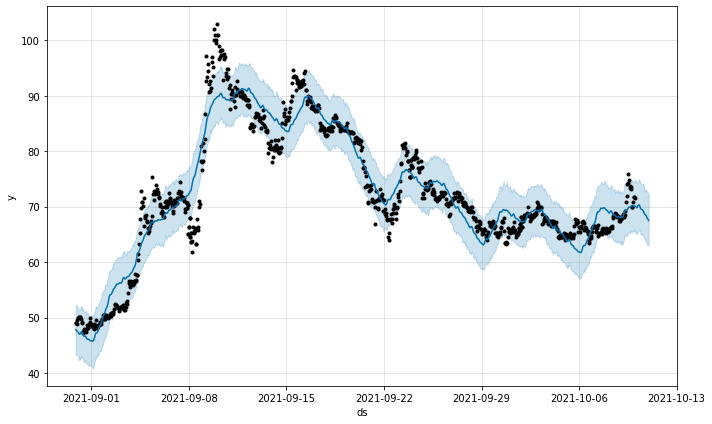

In [ ]:
#그래프1
fig1 = model.plot(forecast)

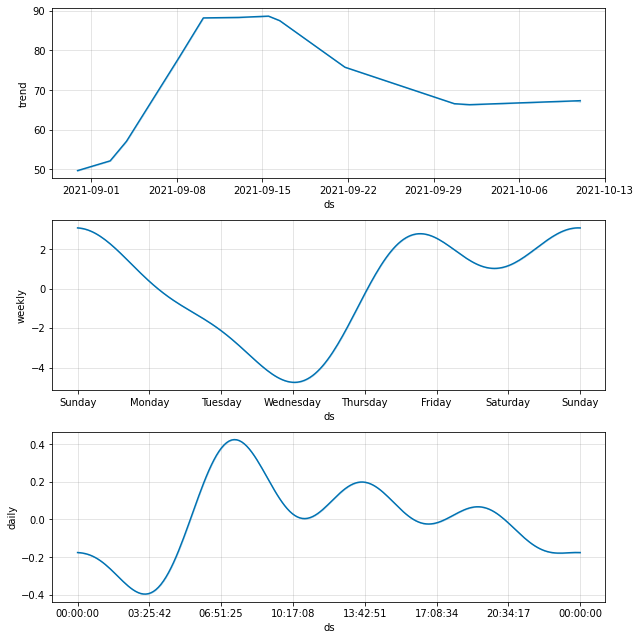

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

In [ ]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price(coin)
nowValue

71.6

In [ ]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

69.99444027301023

In [ ]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  71.6
종가의 가격:  69.99444027301023


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-30 21:00:00,49.712217,43.343052,52.348026,49.712217,49.712217,-1.875838,-1.875838,-1.875838,-0.063621,-0.063621,-0.063621,-1.812216,-1.812216,-1.812216,0.0,0.0,0.0,47.836379
1,2021-08-30 22:00:00,49.750617,43.351239,52.167784,49.750617,49.750617,-2.067329,-2.067329,-2.067329,-0.151075,-0.151075,-0.151075,-1.916254,-1.916254,-1.916254,0.0,0.0,0.0,47.683287
2,2021-08-30 23:00:00,49.789017,43.169589,52.218836,49.789017,49.789017,-2.203066,-2.203066,-2.203066,-0.178973,-0.178973,-0.178973,-2.024093,-2.024093,-2.024093,0.0,0.0,0.0,47.585951
3,2021-08-31 00:00:00,49.827417,43.102789,51.982789,49.827417,49.827417,-2.311728,-2.311728,-2.311728,-0.175791,-0.175791,-0.175791,-2.135937,-2.135937,-2.135937,0.0,0.0,0.0,47.515688
4,2021-08-31 01:00:00,49.865817,42.997424,51.792890,49.865817,49.865817,-2.464468,-2.464468,-2.464468,-0.212576,-0.212576,-0.212576,-2.251892,-2.251892,-2.251892,0.0,0.0,0.0,47.401349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,2021-10-10 20:00:00,67.315243,63.555158,72.779064,67.141480,67.479699,0.974935,0.974935,0.974935,0.033362,0.033362,0.033362,0.941573,0.941573,0.941573,0.0,0.0,0.0,68.290177
984,2021-10-10 21:00:00,67.319869,63.235420,72.812638,67.104346,67.503758,0.729562,0.729562,0.729562,-0.063621,-0.063621,-0.063621,0.793183,0.793183,0.793183,0.0,0.0,0.0,68.049430
985,2021-10-10 22:00:00,67.324494,63.130521,72.703868,67.091834,67.538787,0.496218,0.496218,0.496218,-0.151075,-0.151075,-0.151075,0.647294,0.647294,0.647294,0.0,0.0,0.0,67.820712
986,2021-10-10 23:00:00,67.329120,63.190980,72.139458,67.060174,67.566241,0.325535,0.325535,0.325535,-0.178973,-0.178973,-0.178973,0.504508,0.504508,0.504508,0.0,0.0,0.0,67.654655
